# Portfolio 5
### Group-level fMRI analysis on the Face-Word Data Using Searchlight 

*by Laura W. Paaby (AU668707)*

In [ ]:
# importing packages
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pickle
import pandas as pd
import nilearn
import sklearn

#### Loading the faceWord searchlight data from one participant

In [4]:
import pickle

now = datetime.now()
print('Starting cell:',now.strftime("%H:%M:%S"))

f = open('/work/816119/FaceWordData/WordFace_searchlight_1.pkl', 'rb')
searchlight = pickle.load(f)
f.close()
print(searchlight)

now = datetime.now()
print('Finishing cell:',now.strftime("%H:%M:%S"))

Starting cell: 16:28:11
SearchLight(cv=10, estimator=LinearSVC(dual='auto', max_iter=2000),
            mask_img=<nibabel.nifti1.Nifti1Image object at 0x7ff4d7f88070>,
            n_jobs=-1,
            process_mask_img=<nibabel.nifti1.Nifti1Image object at 0x7ff36d9c8d00>,
            radius=5, verbose=10)
Finishing cell: 16:28:12


/home/ucloud/.local/lib/python3.10/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator LinearSVC from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


### Plotting searchlight from one participant

Starting cell: 16:28:26
(193, 235, 198)


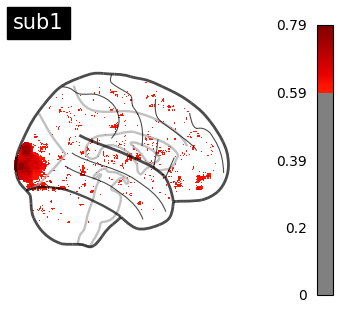

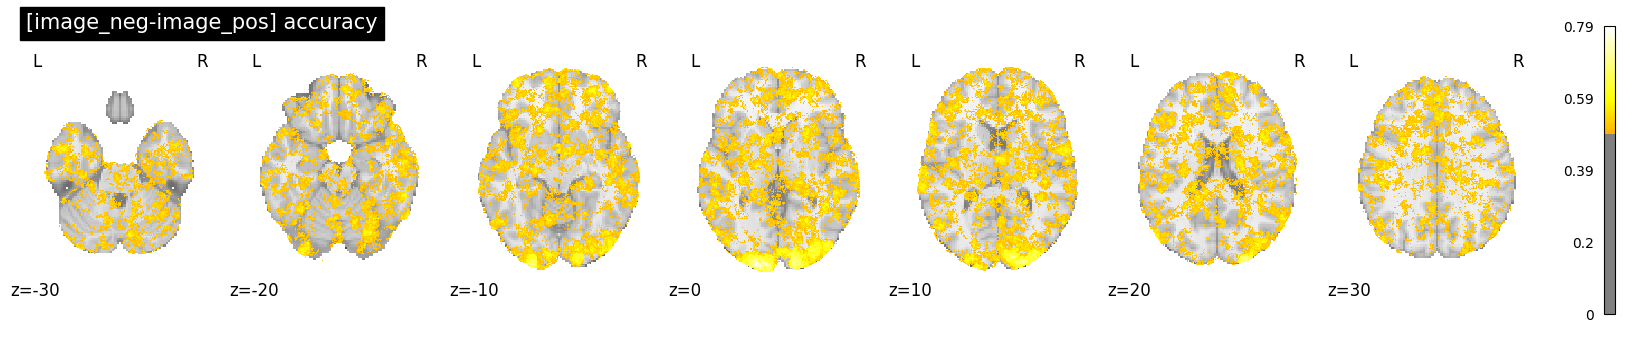

Finishing cell: 16:28:31


In [5]:
from nilearn.plotting import plot_glass_brain, plot_stat_map
from nilearn.image import new_img_like
import numpy as np

from nilearn import plotting
import matplotlib.pyplot as plt
mask_wb_filename='/work/816119/FaceWordData/BIDS/derivatives/sub-0054/anat/sub-0054_acq-T1sequence_run-1_space-MNI152NLin2009cAsym_desc-brain_mask.nii.gz'

searchlight_img = new_img_like(mask_wb_filename, searchlight.scores_)
print(searchlight_img.shape)


plot_glass_brain(searchlight_img, cmap='jet',colorbar=True, threshold=0.6,
                              title=('sub1'),
                              plot_abs=False, display_mode='x')

   
#plt.suptitle('Classification accuracy (unc Acc>0.6)')
plt.show()

plot_stat_map(searchlight_img, cmap='cold_hot',threshold=0.5, cut_coords=[-30,-20,-10,0,10,20,30],
              display_mode='z',  black_bg=False,
              title='[image_neg-image_pos] accuracy')
plt.show()

## Load searchlight maps for each participant


In [6]:

from nilearn.image import new_img_like, math_img
N_par=21
searchlight_all= np.empty((N_par, 0)).tolist()
searchlight_all=[]
searchlight_demean=[]
conditions_label_all= np.empty((N_par, 0)).tolist()
for i in range(0,N_par):
    text = "Loading file %d\n" % (i+1)
    print(text)
    file_name='/work/816119/FaceWordData/WordFace_searchlight_'+str(i)+'.pkl'
    f = open(file_name, 'rb')
    searchlight = pickle.load(f)
    searchlight_img = new_img_like(mask_wb_filename, searchlight.scores_)
    searchlight_all.append(searchlight_img)
    searchlight_demean.append(math_img("(img1-0.5)*img2",img1=searchlight_img,img2=mask_wb_filename)) #baseline bliver chance level, så derfor -0.5 (fordi det er chance level)
    
    #searchlight_all[i]=searchlight
    f.close()


Loading file 1



/home/ucloud/.local/lib/python3.10/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator LinearSVC from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Loading file 2

Loading file 3

Loading file 4

Loading file 5

Loading file 6

Loading file 7

Loading file 8

Loading file 9

Loading file 10

Loading file 11

Loading file 12

Loading file 13

Loading file 14

Loading file 15

Loading file 16

Loading file 17

Loading file 18

Loading file 19

Loading file 20

Loading file 21


<class 'nibabel.nifti1.Nifti1Image'>
data shape (193, 235, 198)
affine:
[[   1.       0.       0.     -96.   ]
 [   0.       0.977    0.    -132.   ]
 [   0.       0.       0.977  -78.   ]
 [   0.       0.       0.       1.   ]]
metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b''
dim_info        : 0
dim             : [  3 193 235 198   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float64
bitpix          : 64
slice_start     : 0
pixdim         

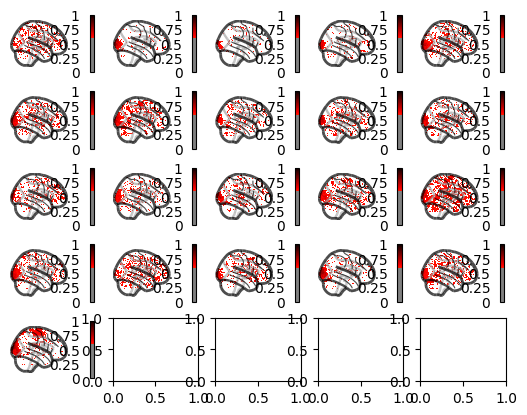

In [7]:
import matplotlib.pyplot as plt
from nilearn import plotting

#subjects = data["ext_vars"]["participant_id"].tolist()
fig, axes = plt.subplots(nrows=5, ncols=5)
for cidx, map in enumerate(searchlight_all):
    plotting.plot_glass_brain(
        map,
        colorbar=True,
        threshold=0.6,
        vmin=0.5,
        vmax=1,
        title=None,
        axes=axes[int(cidx / 5), int(cidx % 5)],
        plot_abs=False,
        display_mode="x",
    )
plt.show()

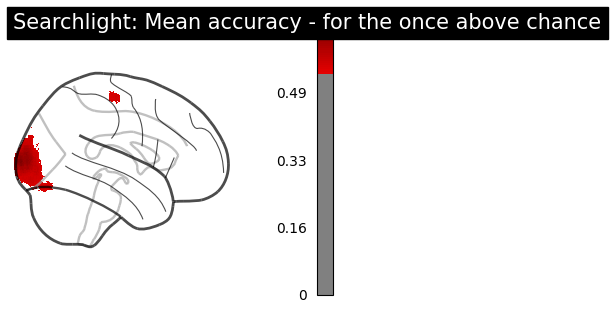

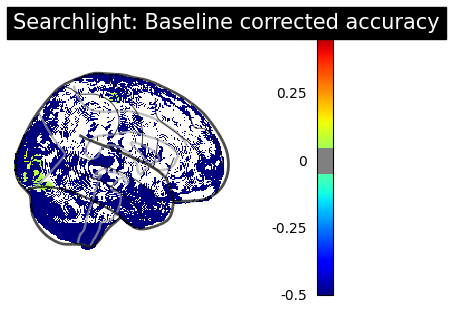

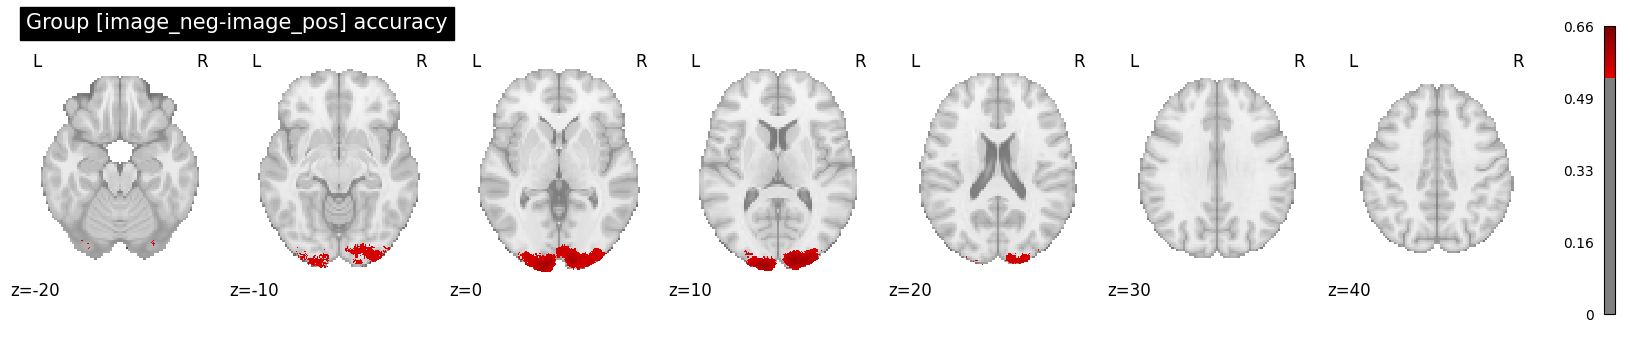

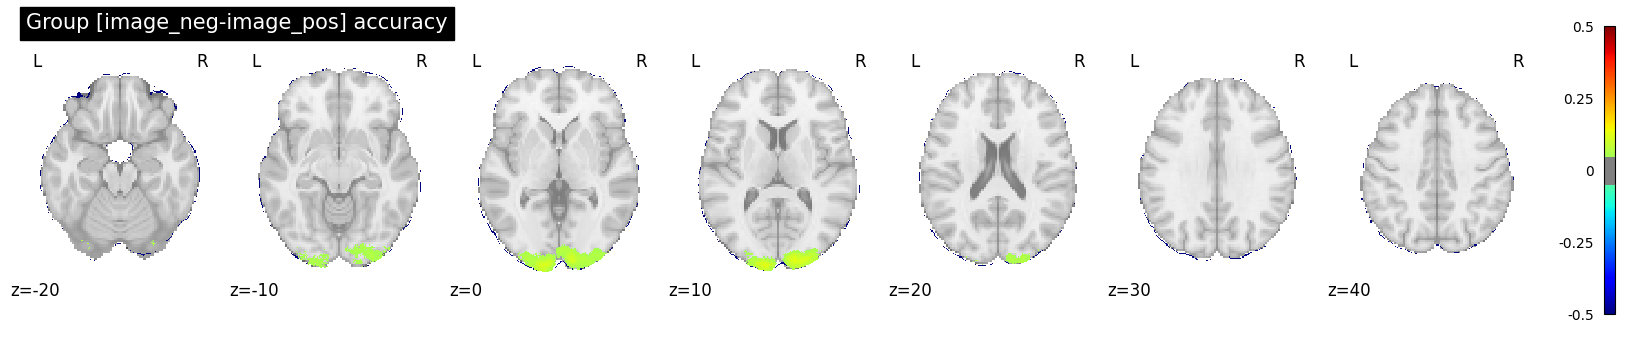

In [9]:
from nilearn.image import new_img_like,  mean_img, concat_imgs

#Concatenate beta maps
searchlight_conc=concat_imgs(searchlight_all)
# Make a mean image
searchlight_mean=mean_img(searchlight_conc)
#Concatenate baseline corrected maps
searchlight_conc_de=concat_imgs(searchlight_demean) 
# Make a mean of the baseline-corrected image
searchlight_mean_demean=mean_img(searchlight_conc_de)

plot_glass_brain(searchlight_mean, cmap='jet',colorbar=True, threshold=0.55,
                              title=('Searchlight: Mean accuracy - for the once above chance'), 
                              plot_abs=False, display_mode='x')

plot_glass_brain(searchlight_mean_demean, cmap='jet',colorbar=True, threshold=0.05,vmin=0,
                              title=('Searchlight: Baseline corrected accuracy'),
                              plot_abs=False, display_mode='x')


plot_stat_map(searchlight_mean, cmap='jet',threshold=0.55, cut_coords=[-20,-10,0,10,20,30,40],
              display_mode='z',  black_bg=False,
              title='Group [image_neg-image_pos] accuracy')
plt.show()
plot_stat_map(searchlight_mean_demean, cmap='jet',threshold=0.05, cut_coords=[-20,-10,0,10,20,30,40],
              display_mode='z',  black_bg=False,
              title='Group [image_neg-image_pos] accuracy')
plt.show()

In [12]:
from nilearn.glm.second_level import SecondLevelModel
import pandas as pd

second_level_input = searchlight_demean
design_matrix = pd.DataFrame(
    [1] * len(second_level_input),
    columns=["intercept"],
)

second_level_model = SecondLevelModel(smoothing_fwhm=6.0, n_jobs=2)
second_level_model = second_level_model.fit(
    second_level_input,
    design_matrix=design_matrix,
)

### transforming accuracies to z-scores to be able to make meaningful threshold for performance 
z_map = second_level_model.compute_contrast(
    second_level_contrast="intercept", # how many sd is our z-scores from chance level 
    output_type="z_score",
)

/home/ucloud/.local/lib/python3.10/site-packages/nilearn/glm/_utils.py:346: RuntimeWarning: divide by zero encountered in divide
  return np.where(X <= 0, 0, 1.0 / X)


In [51]:
from nilearn.plotting.cm import _cmap_d as nilearn_cmaps

The p<0.001 threshold is 3.09
The FDR=.05 threshold is 2.61
The p<.05 Bonferroni-corrected threshold is 5.57


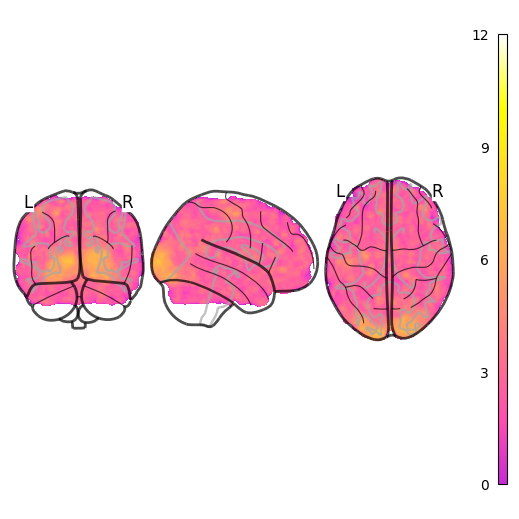

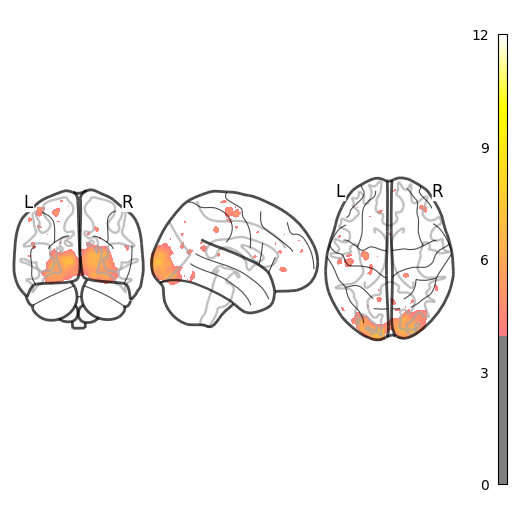

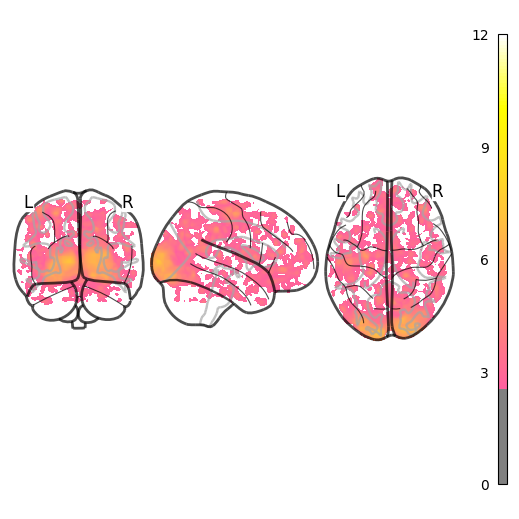

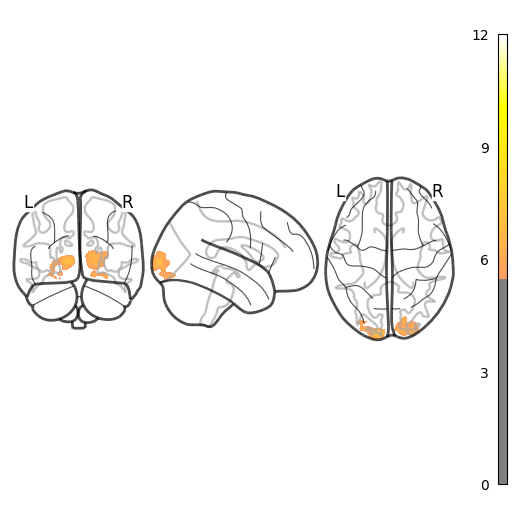

In [59]:
from scipy.stats import norm
from nilearn.image import threshold_img
from nilearn.glm import threshold_stats_img

p_val = 0.001
p001_unc = norm.isf(p_val)
print(f"The p<0.001 threshold is {p001_unc:.3g}")

thresholded_map2, threshold2 = threshold_stats_img(
    z_map, alpha=0.05, height_control="fdr"
)
print(f"The FDR=.05 threshold is {threshold2:.3g}")

thresholded_map3, threshold3 = threshold_stats_img(
    z_map, alpha=0.05, height_control="bonferroni"
)
print(f"The p<.05 Bonferroni-corrected threshold is {threshold3:.3g}")

#Remove negative effects from image (they are meaningless) - below chance 
z_map_disp=threshold_img(
    z_map,
    threshold=0,
    two_sided=False,
)



In [ ]:


display = plotting.plot_glass_brain(
    z_map_disp,
    #threshold=4, 
    vmin=0,
    vmax=12,
    colorbar=True,
    symmetric_cbar=False,
    #display_mode="x",
    plot_abs=False,
    #title="NO THRESHOLD",
    figure=plt.figure(figsize=(5, 5)),
    cmap="gnuplot2"
)
plotting.show()

display = plotting.plot_glass_brain(
    z_map_disp,
    threshold=3.09, 
    vmin=0,
    vmax=12,
    colorbar=True,
    symmetric_cbar=False,
    #display_mode="x",
    plot_abs=False,
    #title="Pos VS Neg Face (p<0.001, uncor)",
    figure=plt.figure(figsize=(5, 5)),
    cmap="gnuplot2"
)
plotting.show()

display = plotting.plot_glass_brain(
    z_map_disp,
    threshold=threshold2,
    vmin=0,
    vmax=12,
    colorbar=True,
    symmetric_cbar=False,
    #display_mode="x",
    plot_abs=False,
    #title="Pos VS Neg Face (p<0.05, FDR)",
    figure=plt.figure(figsize=(5, 5)),
    cmap="gnuplot2"
)
plotting.show()

display = plotting.plot_glass_brain(
    z_map_disp,
    threshold=threshold3,
    vmin=0,
    vmax=12,
    colorbar=True,
    symmetric_cbar=False,
    #display_mode="lyrz",
    #plot_abs=False,
    #title="Pos VS Neg Face (p<0.05, Bonferroni)",
    figure=plt.figure(figsize=(5, 5)),
    cmap="gnuplot2"
)
plotting.show()

# the thresholds is numbers of sd you need to be above baseline in performance accucary (the classification task searchlight make in each voxel)
# in order for it to be significant at the different p-levels. 

# the scale is SD's away from the baseline, which is an accuracy at chance level. 


## Creating atlas table_

In [17]:
### Atlast reader
from atlasreader import create_output
create_output(z_map_disp, voxel_thresh=threshold3, cluster_extent=0,direction='both') # using the bonferroni threshold3
#Atlasreader automatically saves results to both .png-files and a csv-file. Look in your working directory.
pd.read_csv('atlasreader_peaks.csv')


,cluster_id,peak_x,peak_y,peak_z,peak_value,volume_mm,aal,desikan_killiany,harvard_oxford
0,1.0,17.0,-96.828,9.930,6.598592,3629.119210,Cuneus_R,Right-Cerebral-White-Matter,62.0% Right_Occipital_Pole
1,2.0,-11.0,-99.759,3.091,7.221109,2772.906708,Occipital_Sup_L,ctx-lh-lateraloccipital,54.0% Left_Occipital_Pole
2,3.0,16.0,-86.081,-12.541,6.458666,653.852356,Lingual_R,ctx-rh-lingual,39.0% Right_Occipital_Fusiform_Gyrus; 17.0% Ri...
3,4.0,-21.0,-96.828,-10.587,5.870944,99.271015,Occipital_Inf_L,Left-Cerebral-White-Matter,53.0% Left_Occipital_Pole; 5.0% Left_Lateral_O...
4,5.0,-22.0,-92.920,-16.449,5.637603,5.727174,Lingual_L,Left-Cerebral-White-Matter,41.0% Left_Occipital_Pole; 18.0% Left_Occipita...
